<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random forest model -> most important supervised learning model

It is pre-trained with some other data

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

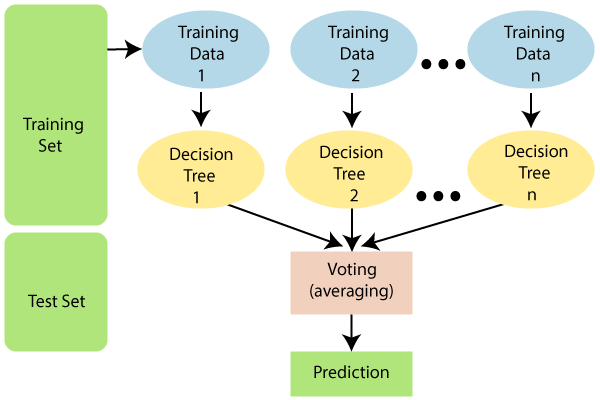

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and visualization

In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


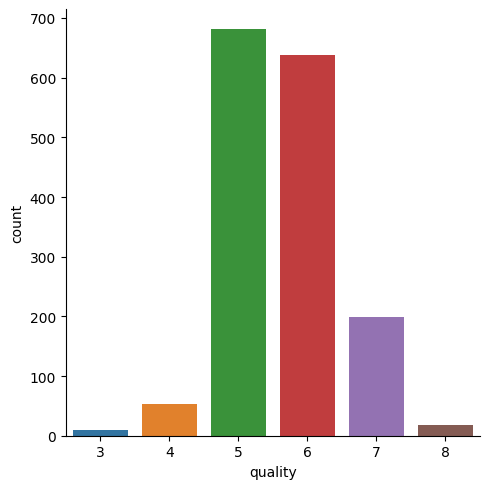

In [ ]:
#number of values for each quality
sns.catplot(data=dataset, x='quality', kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

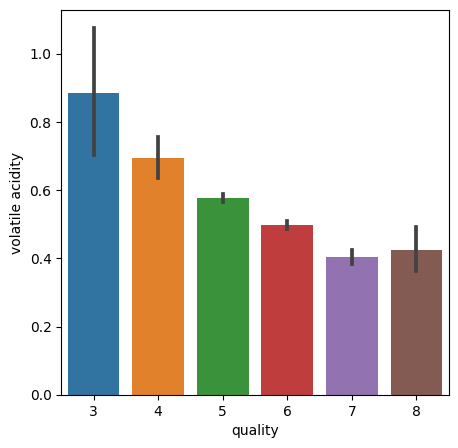

In [ ]:
#comparing volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=dataset, x='quality', y='volatile acidity')

As you can see quality is inversely proportional to volatile acidity

<Axes: xlabel='quality', ylabel='citric acid'>

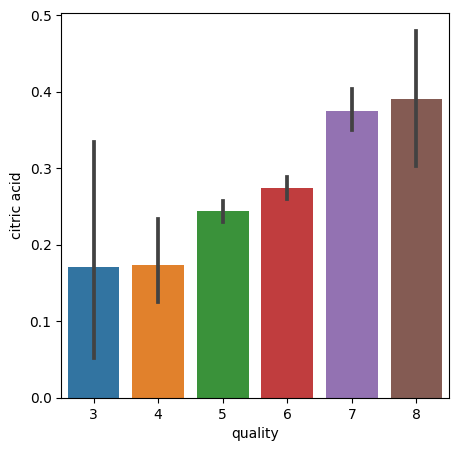

In [ ]:
#comparing volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=dataset, x='quality', y='citric acid')

#Correlation

In [ ]:
corr = dataset.corr()
print(corr)

<Axes: >

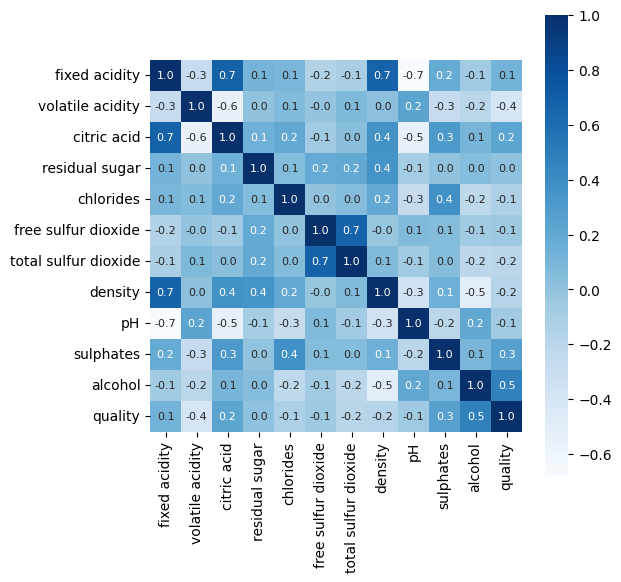

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#Data pre-processing

In [ ]:
x = dataset.drop(columns='quality', axis=1)


Label Binarization

Here we have multiple values in our target column(quality), which can be processed but to make it better we are just giving 2 values to multiple quality values

if quality>=7 -> then it's = 1 (GOOD)

else -> 0 (BAD)

In [ ]:
y = dataset['quality']
for i in range(len(y)):
  if y[i]>=7:
    y[i]=1
  else:
    y[i]=0
print(y.head())
print(y.tail())

"""
another way of doing it would be:
y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
"""

<ipython-input-32-6446acbe9003>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0


0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, dtype: int64


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3, test_size=0.2)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_test_prediction = model.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print(test_accuracy)

1.0


In [ ]:
x_train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(x_train_prediction, y_train)
print(train_accuracy)

1.0


Prediction Model

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
